In [11]:
import os
import sys

# Get the directory of the current file
current_dir = os.path.dirname(os.path.realpath('__file__'))

# Get the parent directory
parent_dir = os.path.dirname(current_dir)

# Add the parent directory to the system path
sys.path.insert(0, parent_dir)
import numpy as np              # Python's standard numerical library
import matplotlib.pyplot as plt # Python's scientific visualization library
import pyidi                    # Python HSC data analysis library
import pickle as pk
from pixel_setter2 import PixelSetter#, play_video, detect_peaks
from pixel_setter import play_video
from scipy.ndimage import uniform_filter
import importlib
from EMA_functions import *
from Feature_selecter import *
import matplotlib.animation as animation
from pyidi import ROISelect
from matplotlib.path import Path
import time
import glob
import itertools
from DIC_functions import *
import ast

root_drive_sim = os.path.normpath('G:/.shortcut-targets-by-id/1k1B8zPb3T8H7y6x0irFZnzzmfQPHMRPx/Illimited Lab Projects/Research Projects/Spiders/Simulations')

# Find all files ending with .cih in the folder
files = glob.glob('D:/thijsmas/HSC/**/*.cihx', recursive=True)

reference_image = (0, 150)
roi_size = (9,9)
bit_depth = 16
n_tracking_points = 3000

line_styles = ['-', '--', '-.', ':']
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

# Create a cycle iterator for line styles and colors
line_style_cycle = itertools.cycle(line_styles)
color_cycle = itertools.cycle(colors)


files = glob.glob('D:/thijsmas/HSC/**/*.cihx', recursive=True)
file = files[0]
name_video = os.path.basename(file)
root_video = os.path.dirname(file)
# name_video =  'Full_web_ecc2_new2_Floc18_v5_S01.cihx'
# root_video = 'H:/My Drive/PHD/HSC/ecc2/Web1/Full_web_ecc2_new2_Floc18_v5_S01'
file_path = os.path.join(root_video, name_video)
EMA_structure = EMA_Structure(name_video)
video = EMA_structure.open_video(add_extension = False)
DIC_structure = DIC_Structure(file_path)
video = DIC_structure.video
df = DIC_structure.list_test_data(test_range = range(1, 100), robostness_check = False)
last_row = df.iloc[-1]  # Get the last row of the DataFrame
test_number = last_row['test_number']

D:/thijsmas/HSC\ecc0\web0\Full_web_ecc0_new_Floc10_v0_S01\Full_web_ecc0_new_Floc10_v0_S01.cihx
Available filter methods: eig0, eig1, harris, trigs, harmonic_mean, eig_theta, eig_theta_off, eig0_test, eig1_test


c:\Users\thijsmas\AppData\Local\anaconda3\Lib\site-packages\pyMRAW.py:103: UserWarning: Clipped footage! (Total frame: 10001, Original total frame: 87371)
  warnings.warn('Clipped footage! (Total frame: {}, Original total frame: {})'.format(cih['Total Frame'], cih['Original Total Frame'] ))


In [12]:
EMA_structure.tp, EMA_structure.d = DIC_structure.join_results([test_number])
td = EMA_structure.d +  EMA_structure.tp.reshape(len(EMA_structure.tp),1,2)

In [13]:
%matplotlib qt
ani = EMA_structure.play_video(video, range(300,video.reader.N-1), interval=100, points=td)

In [14]:
EMA_structure.open_impact_data()
comment = EMA_structure.impact_data['comment']
if comment == '':
    peak_n = 0
elif 'first' in comment:
    peak_n = 0
elif 'second' in comment:
    peak_n = 1
elif 'third' in comment:
    peak_n = 2
else:
    peak_n = 0

In [15]:
%matplotlib qt
d_lim = 25
df = pd.read_csv('H:/My Drive/PHD/HSC/file_descriptions_wEMA.csv')
df_filtered = df[df['filename'].isin([name_video])]
indices = df_filtered.index
prey_ij = ast.literal_eval(df_filtered['prey_ij'].item())
EMA_structure.nut_idx((prey_ij[0], prey_ij[1]), exclude_high_amplitude = True, d_lim = d_lim)
EMA_structure.nearest_nut_index
ani = EMA_structure.play_video(video, range(300,video.reader.N-1), interval=100, points=np.array([td[EMA_structure.nearest_nut_index]]))


# df.loc[indices, 'peak_n'] = int(peak_n)
# df.loc[indices, 'nut_idx'] = EMA_structure.nearest_nut_index
# df.loc[indices, 'd_lim'] = 25
# df_filtered = df[df['filename'].isin([name_video])]
# df['peak_n'] = None
# df['peak_F'] = None
# df['peak_F_threshold'] = None
# df['nut_idx'] = None
# df['d_lim'] = None
# df['smooth_lim'] = None
# df['max_drift'] = None
# df['max_end_drift'] = None
# df['lower'] = None
# df['upper'] = None
# df['pol_order_high'] = None
# df['added_damping'] = None
# df['near_zero_threshold'] = None
# df['approximate_height'] = None

# df.to_csv('H:/My Drive/PHD/HSC/file_descriptions_wEMA.csv', index=False)
# df_filtered

C:\Users\thijsmas\Documents\GitHub\pyidi\pyidi\pyidi.py:269: DeprecationWarning: `self.mraw` is deprecated and will be removed in the next version. Please use `self.reader.mraw` instead.
  warnings.warn('`self.mraw` is deprecated and will be removed in the next version. Please use `self.reader.mraw` instead.', DeprecationWarning)


,Unnamed: 0.35,Unnamed: 0.34,Unnamed: 0.33,Unnamed: 0.32,Unnamed: 0.31,Unnamed: 0.30,Unnamed: 0.29,Unnamed: 0.28,Unnamed: 0.27,Unnamed: 0.26,...,lower,upper,pol_order_high,added_damping,near_zero_threshold,approximate_height,peak_F,peak_F_threshold,shift,test_number
197,197,197,197,197,197,197,197,197,197,197,...,NaN,NaN,NaN,NaN,NaN,NaN,3.369796689382716,0.5,"(0, 0)",1.0


C:\Users\thijsmas\Documents\GitHub\pyidi\pyidi\pyidi.py:269: DeprecationWarning: `self.mraw` is deprecated and will be removed in the next version. Please use `self.reader.mraw` instead.
  warnings.warn('`self.mraw` is deprecated and will be removed in the next version. Please use `self.reader.mraw` instead.', DeprecationWarning)


(-20.0, 20.0)

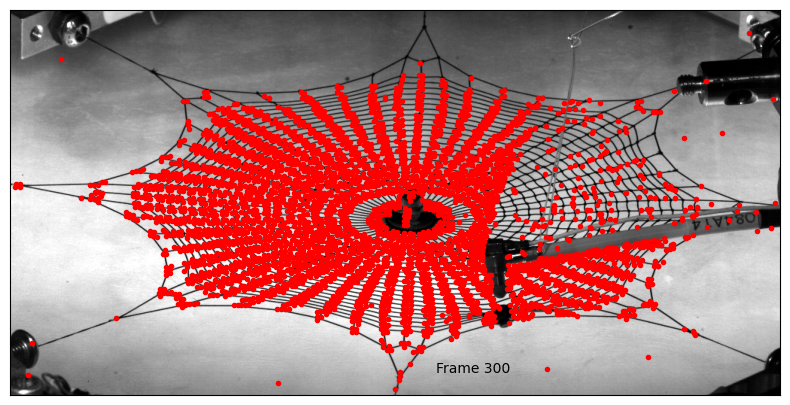

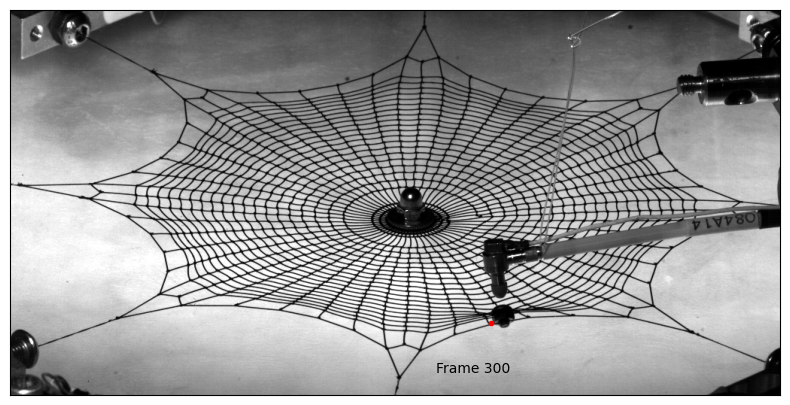

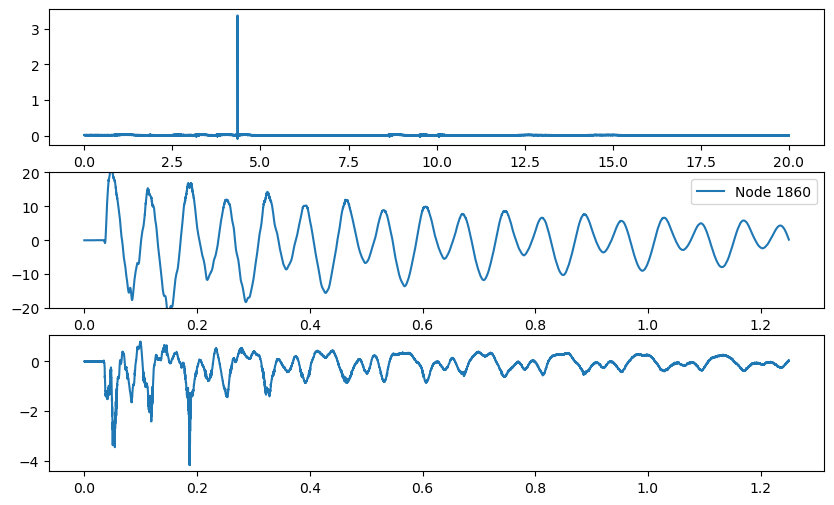

In [16]:
%matplotlib inline
EMA_structure.initialize_signals()
# EMA_structure.initialize_displacement(idx='all', dir='y')
EMA_structure.initialize_displacement(idx='all', dir='xy')
EMA_structure.t_camera_raw = EMA_structure.t_camera_raw
fig, ax = plt.subplots(3, 1, figsize=(10, 6))
ax[0].plot(EMA_structure.t_force_raw, EMA_structure.force_raw)
# EMA_structure.nearest_nut_index = 120
for node in [EMA_structure.nearest_nut_index]: # range(121,130):   #
    ax[1].plot(EMA_structure.t_camera_raw, EMA_structure.displacements_raw[node,:,0], label=f'Node {node}')
    ax[2].plot(EMA_structure.t_camera_raw, EMA_structure.displacements_raw[node,:,1], label=f'Node {node}')
ax[1].legend()
ax[1].set_ylim(-20,20)


In [17]:
# first_zero_id_cam = EMA_structure.find_signal_start(EMA_structure.displacements_raw[EMA_structure.nearest_nut_index], treshold=0.08, approximate_height = .5)
first_zero_id_cam = EMA_structure.find_signal_start(EMA_structure.displacements_raw[EMA_structure.nearest_nut_index,:,0], treshold=0.08, approximate_height = .5)
first_zero_id_force = EMA_structure.find_signal_start(EMA_structure.force_raw, peak_n=peak_n, treshold=0.05)
zeros_camera    = EMA_structure.greatest_common_divisor(EMA_structure.fs_camera, EMA_structure.fs_force)
zeros_force     = EMA_structure.n_samples_camera_to_force(zeros_camera)

# Shift and align signals
EMA_structure.t_camera = EMA_structure.shift_time(EMA_structure.t_camera_raw, EMA_structure.t_camera_raw[first_zero_id_cam-zeros_camera])
EMA_structure.t_force = EMA_structure.shift_time(EMA_structure.t_force_raw, EMA_structure.t_force_raw[first_zero_id_force-zeros_force])

# Clip signals
EMA_structure.t_camera          = EMA_structure.clip_signal_before(EMA_structure.t_camera,first_zero_id_cam-zeros_camera)
# EMA_structure.displacements     = EMA_structure.clip_signal_before(EMA_structure.displacements_raw, first_zero_id_cam-zeros_camera)
EMA_structure.displacements_x     = EMA_structure.clip_signal_before(EMA_structure.displacements_raw[:,:,1], first_zero_id_cam-zeros_camera)
EMA_structure.displacements_y     = EMA_structure.clip_signal_before(EMA_structure.displacements_raw[:,:,0], first_zero_id_cam-zeros_camera)
EMA_structure.t_force           = EMA_structure.clip_signal_before(EMA_structure.t_force, first_zero_id_force-zeros_force)
EMA_structure.force             = EMA_structure.clip_signal_before(EMA_structure.force_raw, first_zero_id_force-zeros_force)

last_id_force, last_id_camera   = EMA_structure.find_last_common_time_ids(EMA_structure.t_camera, EMA_structure.t_force)
EMA_structure.t_camera          = EMA_structure.clip_signal_after(EMA_structure.t_camera, last_id_camera)
# EMA_structure.displacements     = EMA_structure.clip_signal_after(EMA_structure.displacements, last_id_camera)
EMA_structure.displacements_x     = EMA_structure.clip_signal_after(EMA_structure.displacements_x, last_id_camera)
EMA_structure.displacements_y     = EMA_structure.clip_signal_after(EMA_structure.displacements_y, last_id_camera)
EMA_structure.t_force           = EMA_structure.clip_signal_after(EMA_structure.t_force, last_id_force)
EMA_structure.force             = EMA_structure.clip_signal_after(EMA_structure.force, last_id_force)

# Zero Force after impact
EMA_structure.force = EMA_structure.zero_signal_treshold(EMA_structure.force, 0.1)

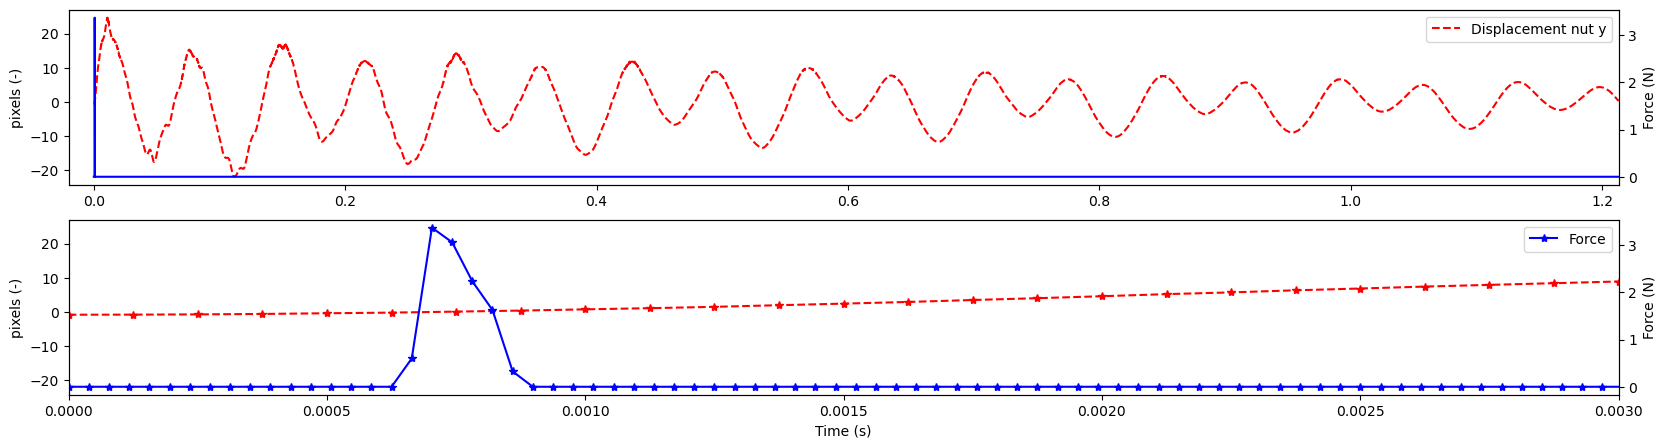

In [18]:
%matplotlib inline
fig, ax = plt.subplots(2,1,figsize=(20,5))
ax0_2 = ax[0].twinx()
ax1_2 = ax[1].twinx()
ax0_2.plot(EMA_structure.t_force, EMA_structure.force,'b-', label='Force (raw))')
# ax[0].plot(EMA_structure.t_camera, EMA_structure.displacements[EMA_structure.nearest_nut_index,:],'r--', label=f'Displacement nut')
# ax[0].plot(EMA_structure.t_camera, EMA_structure.displacements_x[EMA_structure.nearest_nut_index,:],'r--', label=f'Displacement nut x')
ax[0].plot(EMA_structure.t_camera, EMA_structure.displacements_y[EMA_structure.nearest_nut_index,:],'r--', label=f'Displacement nut y')
ax[0].set_xlim([-0.02, EMA_structure.t_camera[-1]])

ax[0].set_ylabel('pixels (-)')
ax0_2.set_ylabel('Force (N)')
ax[0].legend(loc='upper right')


ax1_2.plot(EMA_structure.t_force, EMA_structure.force,'b*-', label='Force')
# ax[1].plot(EMA_structure.t_camera, EMA_structure.displacements[EMA_structure.nearest_nut_index,:],'r*--', label=f'Displacement nut')
# ax[1].plot(EMA_structure.t_camera, EMA_structure.displacements_x[EMA_structure.nearest_nut_index,:],'r*--', label=f'Displacement nut x')
ax[1].plot(EMA_structure.t_camera, EMA_structure.displacements_y[EMA_structure.nearest_nut_index,:],'r*--', label=f'Displacement nut y')
# ax[1].plot(t_camera2[disp_peaks], disp_nut[disp_peaks], 'rx')
ax[1].set_xlim([0, 0.003])
ax[1].set_ylabel('pixels (-)')
ax1_2.set_ylabel('Force (N)')

# set legend to north east
ax1_2.legend()
ax[1].set_xlabel('Time (s)')
plt.show()
fig.savefig(os.path.join(EMA_structure.root_simulations, 'signals', f'{EMA_structure.file_name} - example impact.png'), dpi=300, bbox_inches='tight')